In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mlp

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/salary.csv')

In [ ]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,NaN
2,1.5,NaN
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
print(data.shape)

(30, 2)


In [ ]:
print(data.columns)

Index(['YearsExperience', 'Salary'], dtype='object')


In [ ]:
print(data.isna().sum())

YearsExperience    0
Salary             0
dtype: int64


In [ ]:
data['Salary'] = data['Salary'].fillna(data['Salary'].mean())

In [ ]:
print(data)

    YearsExperience         Salary
0               1.1   39343.000000
1               1.3   78434.071429
2               1.5   78434.071429
3               2.0   43525.000000
4               2.2   39891.000000
5               2.9   56642.000000
6               3.0   60150.000000
7               3.2   54445.000000
8               3.2   64445.000000
9               3.7   57189.000000
10              3.9   63218.000000
11              4.0   55794.000000
12              4.0   56957.000000
13              4.1   57081.000000
14              4.5   61111.000000
15              4.9   67938.000000
16              5.1   66029.000000
17              5.3   83088.000000
18              5.9   81363.000000
19              6.0   93940.000000
20              6.8   91738.000000
21              7.1   98273.000000
22              7.9  101302.000000
23              8.2  113812.000000
24              8.7  109431.000000
25              9.0  105582.000000
26              9.5  116969.000000
27              9.6 

In [ ]:
x=data.iloc[:,:-1]
x

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [ ]:
y=data.iloc[:,-1:]
y

,Salary
0,39343.000000
1,78434.071429
2,78434.071429
3,43525.000000
4,39891.000000
5,56642.000000
6,60150.000000
7,54445.000000
8,64445.000000
9,57189.000000


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
x_train

,YearsExperience
26,9.5
3,2.0
24,8.7
22,7.9
23,8.2
4,2.2
2,1.5
25,9.0
6,3.0
18,5.9


In [ ]:
y_train

,Salary
26,116969.000000
3,43525.000000
24,109431.000000
22,101302.000000
23,113812.000000
4,39891.000000
2,78434.071429
25,105582.000000
6,60150.000000
18,81363.000000


In [ ]:
y_test

,Salary
17,83088.0
21,98273.0
10,63218.0
19,93940.0
14,61111.0
20,91738.0


In [ ]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
y_train=sd.fit_transform(y_train)
y_test=sd.fit_transform(y_test)

In [ ]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
x_train=sd.fit_transform(x_train)
x_test=sd.fit_transform(x_test)

In [ ]:
print(data.corr())

                 YearsExperience    Salary
YearsExperience         1.000000  0.906065
Salary                  0.906065  1.000000


In [ ]:
from sklearn.linear_model import LinearRegression
rg=LinearRegression()
rg.fit(x_train,y_train)

LinearRegression()

In [ ]:
rg.coef_,rg.intercept_

array([-1.5531421])

In [ ]:
#y=mx+c
rg.predict([[20]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[4.37299629]])

In [ ]:
y_pred1=rg.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
print("r2_score",r2_score(y_test,y_pred1))
print("MSE",mean_squared_error(y_test,y_pred1))

r2_score 0.2256921149182114
MSE 166790279.2625918


Text(0, 0.5, 'SALARY')

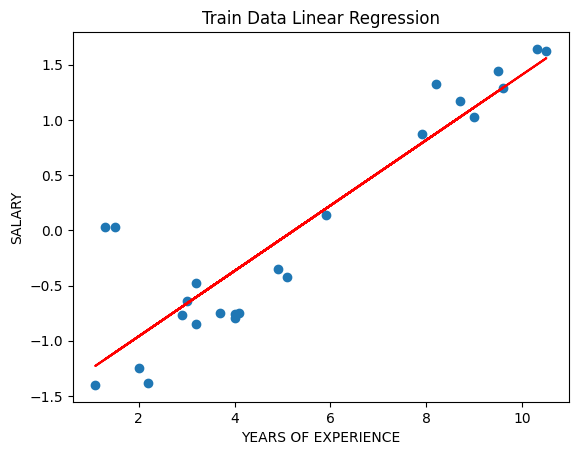

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x_train,y_train)
plt.plot(np.array(x_train),rg.predict(x_train),color='red')
plt.title("Train Data Linear Regression")
plt.xlabel("YEARS OF EXPERIENCE")
plt.ylabel('SALARY')

Text(0, 0.5, 'SALARY')

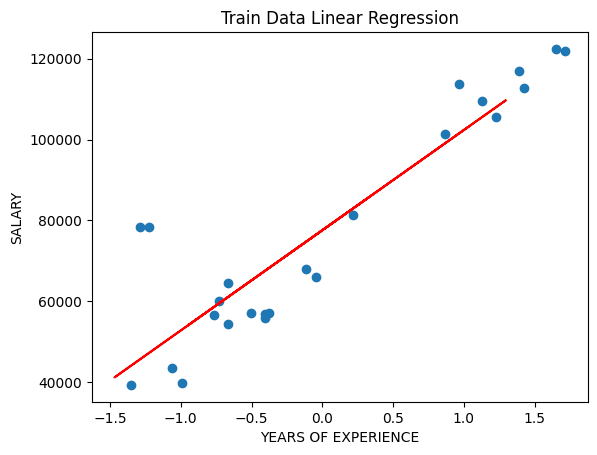

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x_train,y_train)
plt.plot(np.array(x_test),y_pred1,color='red')
plt.title("Train Data Linear Regression")
plt.xlabel("YEARS OF EXPERIENCE")
plt.ylabel('SALARY')